In [141]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

Starten met exploreren en importeren van data

In [142]:
base_path = 'dataRaw/'
dataRaw = pd.read_csv(base_path + 'data.csv', sep=',', low_memory=False)
holidays_events = pd.read_csv(base_path + 'holidays_events(India).csv', sep=';')
items = pd.read_csv(base_path + 'items.csv', sep=';', low_memory=False)
oilRaw = pd.read_csv(base_path + 'oil(India).csv', sep=',', skipinitialspace=True)
stores = pd.read_csv(base_path + 'stores.csv', sep=';', encoding='ISO-8859-1')
testRaw = pd.read_csv(base_path + 'test.csv', sep=',')
transactions = pd.read_csv(base_path + 'transactions.csv', sep=',')

appart pre-processing van de grote data en test files

In [143]:
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')
data = dataRaw.copy()
data['date'] = pd.to_datetime(dataRaw['date'], format='%Y-%m-%d')
data['unit_sales'] = dataRaw['unit_sales'].round(2)

vanaf hier gaan we de data file exploreren

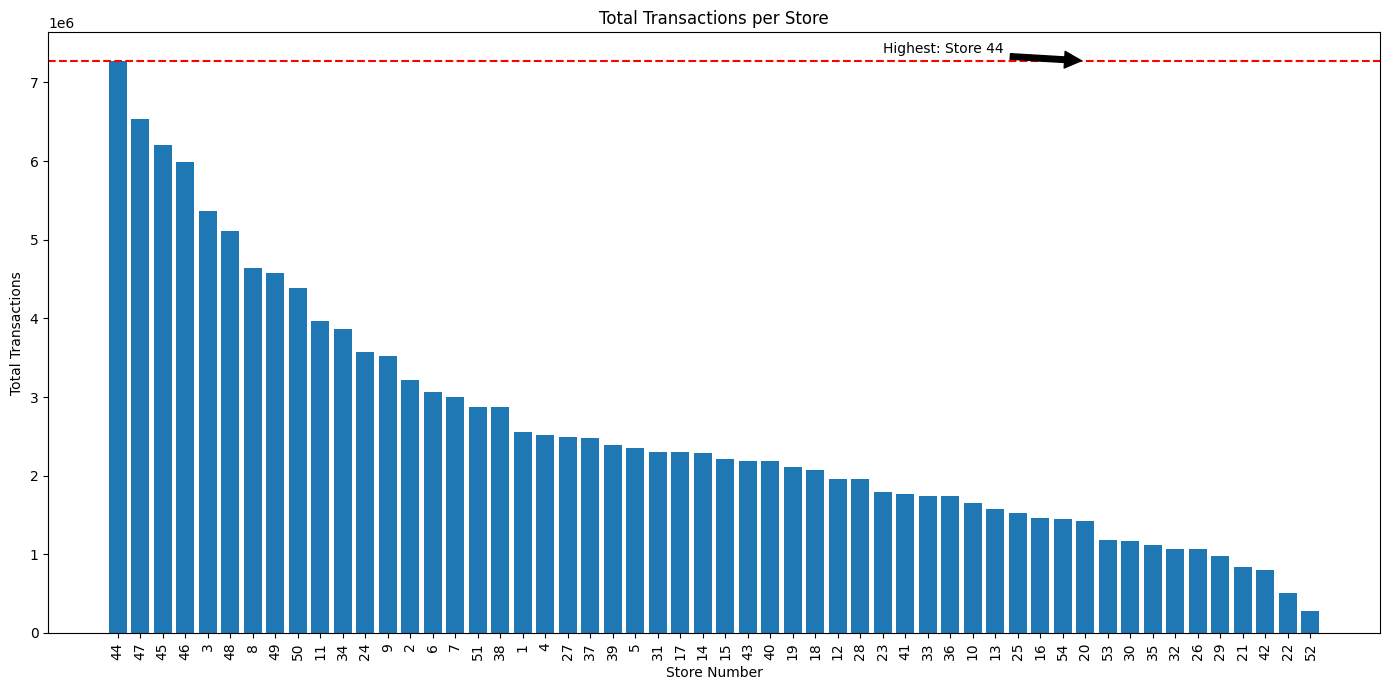

In [150]:
# Aggregate transactions by store number to find the total sales (transactions) per store
total_sales_per_store = transactions.groupby('store_nbr')['transactions'].sum().reset_index()

# Find the store with the highest total sales
highest_sales_store = total_sales_per_store.loc[total_sales_per_store['transactions'].idxmax()]

highest_sales_store

# Sort the stores by sales in descending order for better visualization
total_sales_per_store_sorted = total_sales_per_store.sort_values('transactions', ascending=False)

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(total_sales_per_store_sorted['store_nbr'].astype(str), total_sales_per_store_sorted['transactions'])
plt.xlabel('Store Number')
plt.ylabel('Total Transactions')
plt.title('Total Transactions per Store')
plt.xticks(rotation=90)  # Rotate store number labels to avoid overlap
plt.tight_layout()

# Highlight the store with the highest sales
plt.axhline(y=highest_sales_store['transactions'], color='r', linestyle='--')
plt.annotate(f'Highest: Store {highest_sales_store["store_nbr"]}', 
             xy=(highest_sales_store["store_nbr"] - 1, highest_sales_store['transactions']),
             xytext=(highest_sales_store["store_nbr"] - 10, highest_sales_store['transactions'] + 100000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.show()


In [154]:
# Filter stores in West Bengal
wb_stores = stores[stores['state'] == 'West Bengal']

# Merge transactions with West Bengal stores to focus on transactions in West Bengal
wb_transactions = pd.merge(transactions, wb_stores, on='store_id')

# Merge sales data (assuming sales links items and transactions) with items to categorize by item family
#wb_sales_items = pd.merge(sales, items, on='item_id')
#wb_sales_items = pd.merge(sales, items, on='item_id', how='left')
wb_sales_items = pd.merge(data, items, left_on='item_nbr', right_on='item_nbr', how='left')



# Further merge to focus on West Bengal sales
wb_sales = pd.merge(wb_sales_items, wb_transactions, on='transaction_id')

# Aggregate sales by item family to find the most sold item family in West Bengal
wb_sales_grouped = wb_sales.groupby('item_family')['sales_amount'].sum().reset_index()

# Identify the item family with the highest sales
most_sold_item_family = wb_sales_grouped.sort_values('sales_amount', ascending=False).head(1)

print(most_sold_item_family)

KeyError: 'store_id'

In [ ]:
# Merge the sales dataframe with the items dataframe to attribute each sale to a specific item family
merged_sales_item_df = pd.merge(sales, items, on='item_id', how='left')

sales_by_family = merged_sales_item_df.groupby('family')['unit_sales'].sum().reset_index()

# Identify the most sold item family
most_sold_family = sales_by_family.sort_values('unit_sales', ascending=False).head(1)

print(most_sold_family)